#### Kaggle Titanic Challenge
Goal: Predict the survivor of the Titanic by implementing a supervised learning algorithm

##### 1. The imports

In [1]:
import re
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
import numpy as np
from sklearn.model_selection import train_test_split



###### 2. Reading the training data

In [2]:
passengers = pd.read_csv('passengers_dataset/train.csv')
passengers.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


###### 3.  Data Preprocessing 

I select certain columns to build my feature vector 

In [3]:
passengers = passengers.loc[:, ['Survived', 'Age', 'SibSp', 'Parch',]]
# Sanity Check, observe the data filtered
passengers.head()

,Survived,Age,SibSp,Parch
0,0,22.0,1,0
1,1,38.0,1,0
2,1,26.0,0,0
3,1,35.0,1,0
4,0,35.0,0,0


##### 5. Data distribution
Plotting using pandas plot method

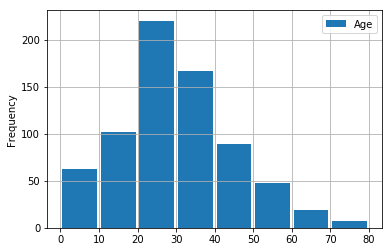

In [4]:

ages = passengers[['Age']].plot(kind='hist', bins= [0, 10, 20, 30, 40, 50, 60, 70, 80 ], rwidth=0.9, grid= True)
plt.show()

##### 5.1 Data distribution: Selecting Survivors and non-survivors separately
In here, the goal is to plot the feature vectors selected and see if the training data is linearly separable

In [5]:
survivor_list = passengers.loc[passengers['Survived']==1]
# sanity check
survivor_list.head()

,Survived,Age,SibSp,Parch
1,1,38.0,1,0
2,1,26.0,0,0
3,1,35.0,1,0
8,1,27.0,0,2
9,1,14.0,1,0


In [6]:
dead_list = passengers.loc[passengers['Survived']==0]
dead_list.head()

,Survived,Age,SibSp,Parch
0,0,22.0,1,0
4,0,35.0,0,0
5,0,NaN,0,0
6,0,54.0,0,0
7,0,2.0,3,1


##### 5.2 Feature Vector Age vs Ticket vs Siblings
The method values returns a numpy array

In [7]:
dead_age = dead_list['Age'].values
#dead_ticket = dead_list['Ticket'].values
dead_siblings = dead_list['SibSp'].values

survivor_age = survivor_list['Age'].values
#survivor_ticket = survivor_list['Ticket'].values
survivor_siblings = survivor_list['SibSp'].values

##### 5.3 Plotting the feature vectors

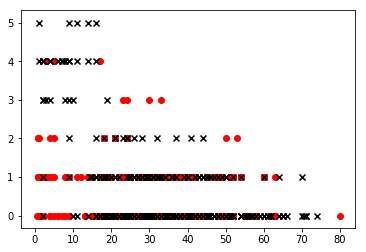

In [8]:
plt_survivor = plt.scatter(survivor_age, survivor_siblings, color = 'Red', marker = 'o')
plt_dead = plt.scatter(dead_age, dead_siblings, color = 'Black', marker='x')

##### 5.3 Cleaning the ticket data

In [9]:
def ticket_cleaner(ticket_data):
    data_cleaned = []
    for iterator in range(0, len(ticket_data)):
        ticket_cleaned = re.findall('\d+\d+', ticket_data[iterator])
        data_cleaned.extend(ticket_cleaned)
    diff = len(ticket_data)- len(data_cleaned)
    if diff !=0:
        for extensor in range(0, diff):
            data_cleaned.append(str(0))
    return data_cleaned

In [ ]:
survivor_ticket_cleaned = ticket_cleaner(survivor_ticket)
dead_ticket_cleaned = ticket_cleaner(dead_ticket)

In [ ]:
plt_survivor = plt.scatter(survivor_age, survivor_ticket_cleaned, color = 'Red', marker = 'o')
plt_dead = plt.scatter(dead_age, dead_ticket_cleaned, color = 'Black', marker='x')

##### 6. The SVM input features

In [50]:
# The class label selection
y = passengers.loc[:,'Survived'].values

# The features vector 
tr_ages = passengers.loc[:, 'Age']
tr_ages_values = passengers.loc[:, 'Age'].values # The values within the DF as numpy array
tr_ages = tr_ages.fillna(np.random.randint(81)) # remove the NaN WARNING- THIS CAN STILL PUT A NAN
tr_ages = tr_ages.values

'''
ticket = passengers.loc[:, 'Ticket']
ticket_values = passengers.loc[:,'Ticket'].values
ticket = ticket.fillna(np.random.choice(ticket_values))
ticket_data = ticket.values
ticket = np.asarray(ticket_cleaner(ticket_data))
'''

tr_siblings = passengers.loc[:, 'SibSp']
tr_siblings_values = passengers.loc[:, 'SibSp'].values
tr_siblings = tr_siblings.fillna(np.random.randint(9))
tr_siblings = tr_siblings.values


In [51]:
training_data = np.column_stack((tr_ages, tr_siblings))
#training_data = np.column_stack((training_data, tr_siblings_values))
# sanity check
assert len(training_data)== len(y)
assert training_data.shape == (891,2)

##### 7. splitting the data

In [52]:
x_tr, x_tst, y_tr, y_tst = train_test_split(training_data, y, test_size= 0.4)

In [53]:
#print(x_tst)

###### 8. The model

In [54]:
svm = SVC(kernel='rbf', gamma = 10, C = 1).fit(x_tr, y_tr)
print(svm.score(x_tr, y_tr))
print(svm.score(x_tst, y_tst))

0.7471910112359551
0.6442577030812325


In [39]:
print(svm.predict(x_tst))

[0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 0 1 1 0 0 1 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0
 0 1 1 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 1 0 1 1 0 0]


##### 9. Saving to csv

In [40]:
test_data = pd.read_csv('passengers_dataset/test.csv')
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [41]:

# The features vector 
test_ages = test_data.loc[:, 'Age']
test_ages_values = test_data.loc[:, 'Age'].values # The values within the DF as numpy array
test_ages = test_ages.fillna(np.random.randint(81)) # remove the NaN WARNING- THIS CAN STILL PUT A NAN
test_ages = test_ages.values

'''
test_ticket = test_data.loc[:, 'Ticket']
test_ticket_values = test_data.loc[:,'Ticket'].values
test_ticket = test_ticket.fillna(np.random.choice(test_ticket_values))
test_ticket_data = test_ticket.values
test_ticket = np.asarray(ticket_cleaner(test_ticket_data))
'''

test_siblings = test_data.loc[:, 'SibSp']
test_siblings_values = test_data.loc[:, 'SibSp'].values
test_siblings = test_siblings.fillna(np.random.randint(9))
test_siblings = test_siblings.values


In [46]:
test_data_p = np.column_stack((test_ages, test_siblings))
#test_data_p = np.column_stack((test_data_p, test_siblings))
# sanity check
assert len(test_data_p)== len(test_data)
assert test_data_p.shape == (len(test_data), 2)


print(len(test_data_p))
#print(test_data_p)
print(test_data_p[0].shape)
the_prediction = svm.predict(test_data_p)
#predictions = []
#for entry in test_data_p:
 #   predictions.append(svm.predict([entry]))

    

418
(2,)


In [43]:
print(the_prediction)

[0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 1 1 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 1 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 1 0 0 0 0 0 0 1 1
 1 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0
 0 1 0 1 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0]


In [44]:
results = pd.DataFrame({
    "PassengerId": test_data['PassengerId'],
    "Survived": the_prediction
})
results.to_csv('titanic.csv', index = False)

In [45]:
results

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,1
5,897,0
6,898,0
7,899,0
8,900,0
9,901,0
